## 1 IMPORTS

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import os
from glob import glob
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
os.chdir("/Users/christianleis/Library/CloudStorage/OneDrive-Personal/Desktop-OneDrive/02_TU_Wien/Project/reddit_inflation_index")
print("Now in:", os.getcwd())

Now in: /Users/christianleis/Library/CloudStorage/OneDrive-Personal/Desktop-OneDrive/02_TU_Wien/Project/reddit_inflation_index


## 2.1 VADER DEV

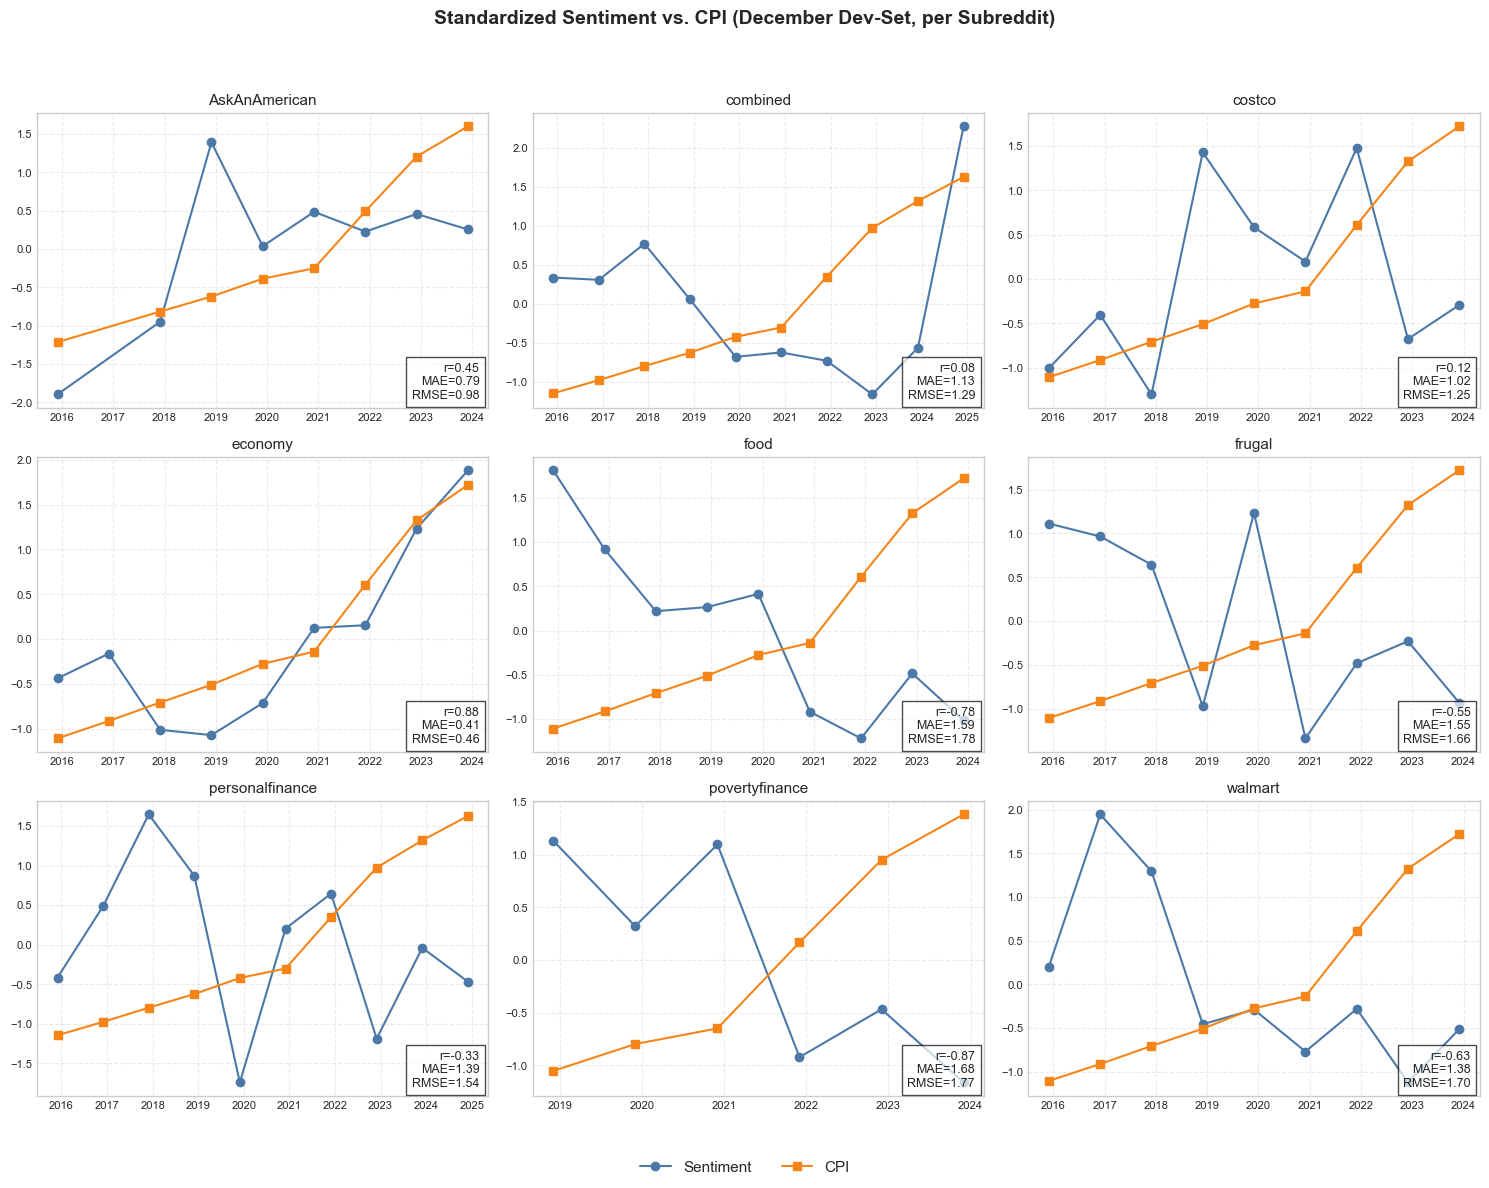

In [10]:
plt.style.use("seaborn-v0_8-whitegrid")  # Moderner Stil

# Farben definieren
sentiment_color = "#4C78A8"  # modernes Indigo-Blau
cpi_color = "#F58518"        # modernes Orange

# Load CPI data and filter to December snapshots
cpi = pd.read_csv("data/inflation/usa_inflation.csv", parse_dates=["date"])
cpi_dec = cpi[cpi["date"].dt.month == 12]

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, file in enumerate(sorted(glob("data/output/model_1_vader/dev_set/vader_dev_*.csv"))):
    name = os.path.basename(file).replace("vader_dev_", "").replace(".csv", "")
    sentiment = pd.read_csv(file, parse_dates=["date"])
    df = pd.merge(sentiment, cpi_dec, on="date", how="inner")

    df["sentiment_z"] = (df["avg_sentiment"] - df["avg_sentiment"].mean()) / df["avg_sentiment"].std()
    df["cpi_z"] = (df["cpi_value"] - df["cpi_value"].mean()) / df["cpi_value"].std()

    r, _ = pearsonr(df["sentiment_z"], df["cpi_z"])
    mae = mean_absolute_error(df["cpi_z"], df["sentiment_z"])
    rmse = np.sqrt(mean_squared_error(df["cpi_z"], df["sentiment_z"]))

    ax = axes[i]
    ax.plot(df["date"], df["sentiment_z"], label="Sentiment", color=sentiment_color, marker="o", linewidth=1.5)
    ax.plot(df["date"], df["cpi_z"], label="CPI", color=cpi_color, marker="s", linewidth=1.5)
    ax.set_title(name, fontsize=11)
    ax.text(0.98, 0.02, f"r={r:.2f}\nMAE={mae:.2f}\nRMSE={rmse:.2f}",
            transform=ax.transAxes, ha="right", va="bottom",
            fontsize=9, bbox=dict(facecolor="white", alpha=0.7))
    ax.tick_params(labelsize=8)
    ax.grid(True, linestyle="--", alpha=0.4)

# Gemeinsame Legende + Achsen
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=11)
fig.suptitle("Standardized Sentiment vs. CPI (December Dev-Set, per Subreddit)", fontsize=14, weight="bold")
plt.tight_layout(rect=[0, 0.05, 1, 0.95])

# Als PDF oder PNG speichern für Overleaf
plt.savefig("sentiment_vs_cpi_grid.pdf")  # oder .png
plt.show()